In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim 
import torch.utils.data as utils

In [3]:
f = pd.read_hdf("Nsubjettiness_mjj.h5")

In [4]:
f.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,98.677270,0.528903,0.788281,0.904471,4.241889,136.0,1285.895950,53.519023,0.668562,0.735745,0.755674,1.895988,128.0,1282.286017,2577.571899,0.0
1,584.595432,0.345626,0.463461,0.865982,1.069972,320.0,1334.493332,405.034096,0.264362,0.793461,0.830032,1.377217,348.0,1306.137883,3807.507389,0.0
2,159.597526,0.677692,0.690707,0.695322,1.310040,332.0,678.557182,113.768840,0.713481,0.922610,0.782783,1.887494,236.0,1072.462085,1710.965414,0.0
3,515.237299,0.091038,0.784454,0.860716,1.102743,248.0,1284.020224,161.648798,0.727507,0.719564,0.870109,1.997360,352.0,1217.031950,2603.379037,0.0
4,142.420213,0.507714,0.522686,0.904070,1.853319,220.0,1087.658980,105.721163,0.344534,0.614579,0.863765,1.113248,204.0,1205.343324,3294.162200,1.0


In [4]:
dt = f.values

In [5]:
dt[:,0] = (dt[:,0]-np.mean(dt[:,0]))/np.std(dt[:,0])
dt[:,1] = (dt[:,1]-np.mean(dt[:,1]))/np.std(dt[:,1])
dt[:,2] = (dt[:,2]-np.mean(dt[:,2]))/np.std(dt[:,2])
dt[:,3] = (dt[:,3]-np.mean(dt[:,3]))/np.std(dt[:,3])
dt[:,4] = (dt[:,4]-np.mean(dt[:,4]))/np.std(dt[:,4])
dt[:,5] = (dt[:,5]-np.mean(dt[:,5]))/np.std(dt[:,5])

dt[:,7] = (dt[:,7]-np.mean(dt[:,7]))/np.std(dt[:,7])
dt[:,8] = (dt[:,8]-np.mean(dt[:,8]))/np.std(dt[:,8])
dt[:,9] = (dt[:,9]-np.mean(dt[:,9]))/np.std(dt[:,9])
dt[:,10] = (dt[:,10]-np.mean(dt[:,10]))/np.std(dt[:,10])
dt[:,11] = (dt[:,11]-np.mean(dt[:,11]))/np.std(dt[:,11])
dt[:,12] = (dt[:,12]-np.mean(dt[:,12]))/np.std(dt[:,12])

In [6]:
idx = dt[:,15]
bkg_idx = np.where(idx==0)[0]
signal_idx = np.where(idx==1)[0]

In [7]:
realnvploss_rnd = np.load('/data/t3home000/spark/LHCOlympics/data/jetimages_rnd_RealNVP_loss.npy')

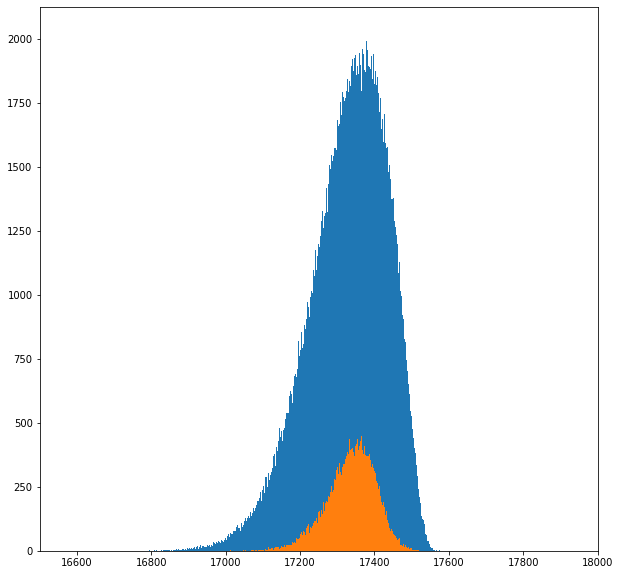

In [11]:
plt.rcParams["figure.figsize"] = (10,10)
plt.hist(realnvploss_rnd[bkg_idx],5000)
plt.hist(realnvploss_rnd[signal_idx],5000)
plt.xlim([16500,18000])
plt.savefig('/data/t3home000/spark/LHCOlympics/plots/rnd_realnvploss.png')
#plt.ylim([0,500])

(array([3.70000e+01, 1.16700e+03, 1.03150e+04, 4.31800e+04, 1.27378e+05,
        2.93883e+05, 3.86330e+05, 1.36746e+05, 9.56000e+02, 8.00000e+00]),
 array([-5.43696854, -4.51002771, -3.58308688, -2.65614605, -1.72920522,
        -0.80226439,  0.12467644,  1.05161727,  1.97855811,  2.90549894,
         3.83243977]),
 <a list of 10 Patch objects>)

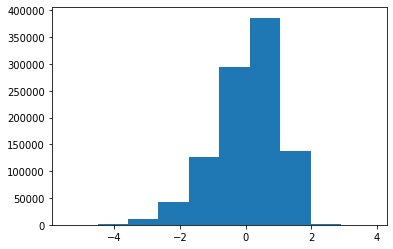

In [8]:
plt.hist(dt[bkg_idx,2])

In [9]:
data = torch.tensor(dt[bkg_idx])
data_train_x_1 = data.t()[0:6].t()
data_train_x_2 = data.t()[7:13].t()
data_train_x = torch.cat((data_train_x_1,data_train_x_2),dim=1)

In [10]:
bs = 256
my_dataset = utils.TensorDataset(data_train_x,data_train_x) 
my_dataloader = utils.DataLoader(my_dataset, batch_size=bs, shuffle=True) 

In [9]:
class Encoder_jet(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(12, 48)
        self.linear2 = nn.Linear(48, 30)
        self.linear3 = nn.Linear(30, 20)
        self.linear4 = nn.Linear(12, 4)

    def forward(self, x):
        x = F.leaky_relu(self.linear1(x))
        x = F.leaky_relu(self.linear2(x))
        x = F.leaky_relu(self.linear3(x))
        x = F.tanh(self.linear4(x))
        return x

In [10]:
class Decoder_jet(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(4, 12)
        self.linear2 = nn.Linear(12, 24)
        self.linear3 = nn.Linear(24, 48)
        self.linear4 = nn.Linear(48, 12)

    def forward(self, x):
        x = F.leaky_relu(self.linear1(x))
        x = F.leaky_relu(self.linear2(x))
        x = F.leaky_relu(self.linear3(x))
        x = self.linear4(x)
        return x

In [13]:
#second architecture
class Encoder_jet(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(12, 48)
        self.linear2 = nn.Linear(48, 30)
        self.linear3 = nn.Linear(30, 20)
        self.linear4 = nn.Linear(20, 10)
        self.linear5 = nn.Linear(10, 6)
        self.linear6 = nn.Linear(6, 3)

    def forward(self, x):
        x = F.leaky_relu(self.linear1(x))
        x = F.leaky_relu(self.linear2(x))
        x = F.leaky_relu(self.linear3(x))
        x = F.leaky_relu(self.linear4(x))
        x = F.leaky_relu(self.linear5(x))
        x = F.tanh(self.linear6(x))
        return x

In [14]:
class Decoder_jet(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(3, 6)
        self.linear2 = nn.Linear(6, 10)
        self.linear3 = nn.Linear(10, 20)
        self.linear4 = nn.Linear(20, 30)
        self.linear5 = nn.Linear(30, 48)
        self.linear6 = nn.Linear(48, 12)
        

    def forward(self, x):
        x = F.leaky_relu(self.linear1(x))
        x = F.leaky_relu(self.linear2(x))
        x = F.leaky_relu(self.linear3(x))
        x = F.leaky_relu(self.linear4(x))
        x = F.leaky_relu(self.linear5(x))
        x = self.linear6(x)
        return x

In [15]:
model_enc = Encoder_jet().cuda()
model_dec = Decoder_jet().cuda()

In [16]:
lrs = 1e-4
optimizer_enc = optim.Adam(model_enc.parameters(), lr = lrs)
optimizer_dec = optim.Adam(model_dec.parameters(), lr = lrs)
loss = nn.MSELoss()

In [17]:
epochs = 20
for epoch in range(epochs):
    model_enc.train()
    model_dec.train()
    for i, dtt in enumerate(my_dataloader):
        optimizer_enc.zero_grad()
        optimizer_dec.zero_grad()
        
        inp = dtt[0].float().cuda()
        output = dtt[1].float().cuda()

        ls = loss(model_dec(model_enc(inp)),output)

        ls.backward()
        optimizer_enc.step()
        optimizer_dec.step()
    if epoch%1==0:
        print("Epoch: " + str(epoch), "Loss Training: " + str(ls.data.cpu().numpy()))

/home/spark/miniconda3/envs/myenv/lib/python3.6/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 0 Loss Training: 0.56458235
Epoch: 1 Loss Training: 0.57191736
Epoch: 2 Loss Training: 0.44961807
Epoch: 3 Loss Training: 0.53347427
Epoch: 4 Loss Training: 0.5093448
Epoch: 5 Loss Training: 0.66830415
Epoch: 6 Loss Training: 0.5444723
Epoch: 7 Loss Training: 0.47677878
Epoch: 8 Loss Training: 0.45231536
Epoch: 9 Loss Training: 0.45192233
Epoch: 10 Loss Training: 0.42329773
Epoch: 11 Loss Training: 0.4274977
Epoch: 12 Loss Training: 0.396494
Epoch: 13 Loss Training: 0.33093956
Epoch: 14 Loss Training: 0.37021175
Epoch: 15 Loss Training: 0.3705119
Epoch: 16 Loss Training: 0.31388864
Epoch: 17 Loss Training: 0.33348897
Epoch: 18 Loss Training: 0.3997377
Epoch: 19 Loss Training: 0.34452268


In [9]:
data_bkg = torch.tensor(dt[bkg_idx])
data_signal = torch.tensor(dt[signal_idx])

In [21]:
j1tau21 = dt_sig[:,1]

In [22]:
j1tau21.shape

(100000,)

In [23]:
tau21choice = np.where(j1tau21>-1.4)[0]

In [24]:
data_sig_slice = torch.tensor(dt_sig[tau21choice])

In [18]:
data_train_x_1 = data_sig_slice.t()[0:6].t()
data_train_x_2 = data_sig_slice.t()[7:13].t()
data_signalslice = torch.cat((data_train_x_1,data_train_x_2),dim=1)

NameError: name 'data_sig_slice' is not defined

In [21]:
data_train_x_1 = data_bkg.t()[0:6].t()
data_train_x_2 = data_bkg.t()[7:13].t()
data_test_bkg = torch.cat((data_train_x_1,data_train_x_2),dim=1)

In [22]:
data_train_x_1 = data_signal.t()[0:6].t()
data_train_x_2 = data_signal.t()[7:13].t()
data_test_signal = torch.cat((data_train_x_1,data_train_x_2),dim=1)

In [28]:
model_enc.eval()
model_dec.eval()

Decoder_jet(
  (linear1): Linear(in_features=3, out_features=6, bias=True)
  (linear2): Linear(in_features=6, out_features=10, bias=True)
  (linear3): Linear(in_features=10, out_features=20, bias=True)
  (linear4): Linear(in_features=20, out_features=30, bias=True)
  (linear5): Linear(in_features=30, out_features=48, bias=True)
  (linear6): Linear(in_features=48, out_features=12, bias=True)
)

In [29]:
z_bkg = model_enc(data_test_bkg[0:1000000].float().cuda()).data.cpu().numpy()
z_signal = model_enc(data_test_signal[0:100000].float().cuda()).data.cpu().numpy()

In [30]:
loss_bkg = torch.mean((model_dec(model_enc(data_test_bkg.float().cuda()))-data_test_bkg.float().cuda())**2,dim=1).data.cpu().numpy()
loss_signal = torch.mean((model_dec(model_enc(data_test_signal.float().cuda()))-data_test_signal.float().cuda())**2,dim=1).data.cpu().numpy()

In [31]:
loss_bkg_truncated = loss_bkg[np.where(loss_bkg<5)[0]]
loss_signal_truncated = loss_signal[np.where(loss_signal<5)[0]]

[]

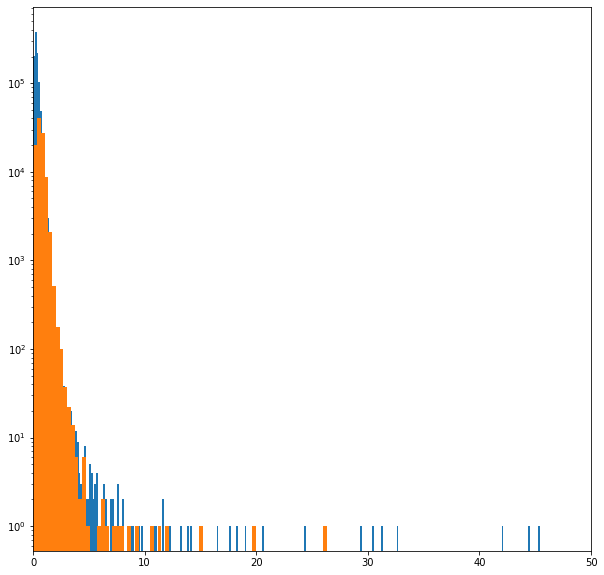

In [32]:
plt.rcParams["figure.figsize"] = (10,10)
plt.hist(loss_bkg,500)
plt.hist(loss_signal,500)
plt.xlim([0,50])
plt.semilogy()
#plt.ylim([0,500])

In [33]:
onlybkg_selected_idx = np.where(loss_bkg>1.5)[0]

In [34]:
dt_bkg = dt[bkg_idx]

In [35]:
dt_bkg.shape

(1000000, 16)

In [34]:
TEST_onybkg_selection_bkgautoencoder = dt_bkg[onlybkg_selected_idx,14]

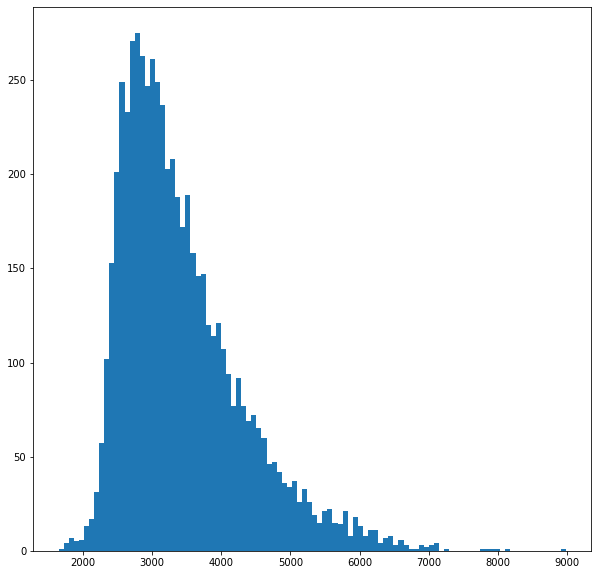

In [35]:
plt.rcParams["figure.figsize"] = (10,10)
plt.hist(TEST_onybkg_selection_bkgautoencoder,100)
plt.savefig('backgroundMorphing_with_bkgAE.png')

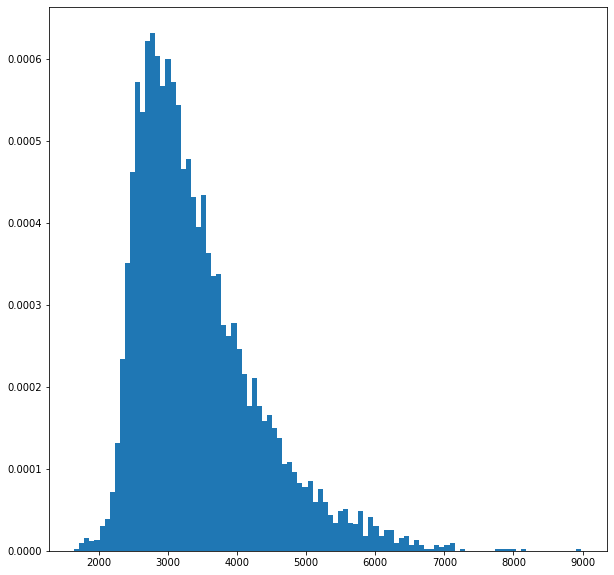

In [36]:
plt.rcParams["figure.figsize"] = (10,10)
plt.hist(TEST_onybkg_selection_bkgautoencoder,100,density=True)
plt.savefig('backgroundMorphing_with_bkgAE_Normalized.png')

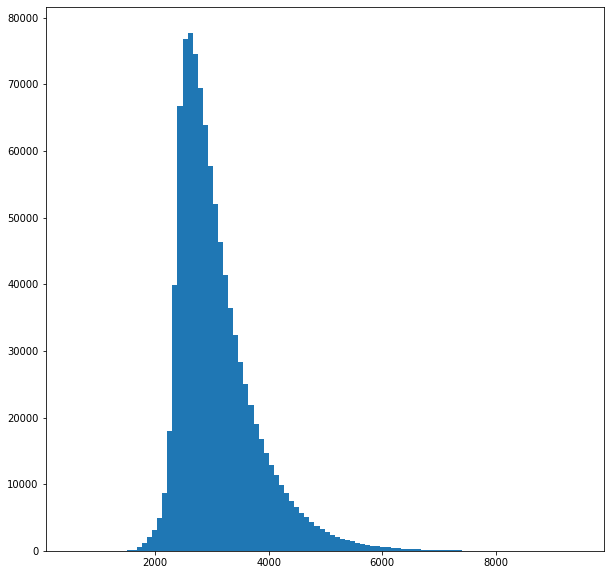

In [37]:
plt.rcParams["figure.figsize"] = (10,10)
plt.hist(dt_bkg[:,14],100)
plt.savefig('defaultbackground_noselection.png')

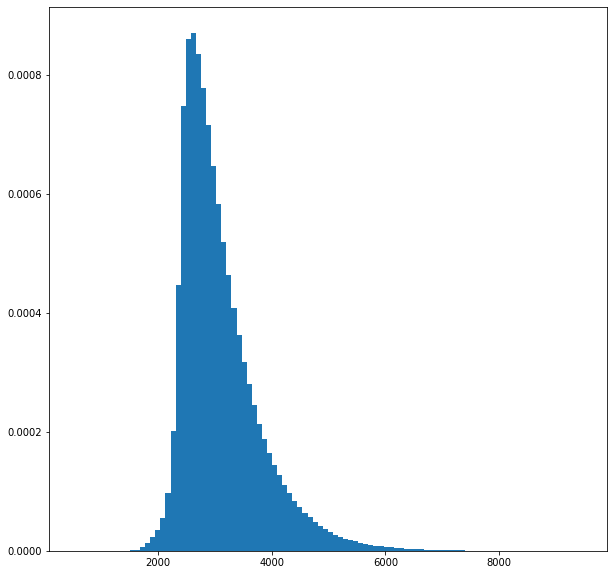

In [38]:
plt.rcParams["figure.figsize"] = (10,10)
plt.hist(dt_bkg[:,14],100,density=True)
plt.savefig('defaultbackground_noselection_Normalized.png')

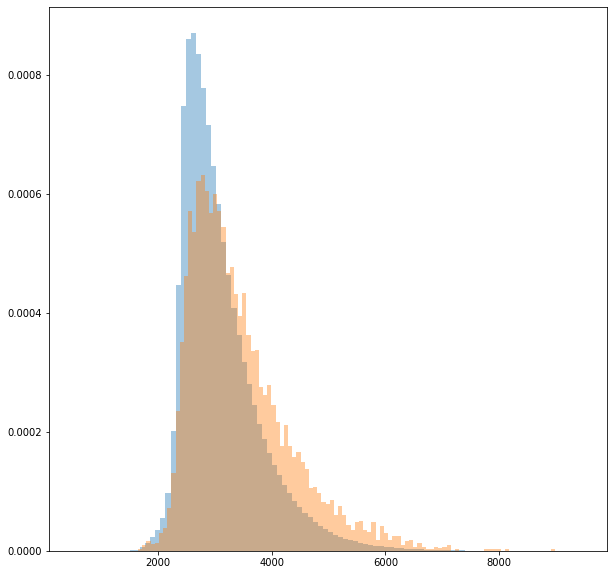

In [39]:
plt.rcParams["figure.figsize"] = (10,10)
plt.hist(dt_bkg[:,14],100,density=True,alpha=0.4)
plt.hist(TEST_onybkg_selection_bkgautoencoder,100,density=True,alpha=0.4)
plt.savefig('backgroundmorphing_normalized_together.png')

# NOW SIGNAL AUTOENCODER #

In [16]:
sig_model_enc = Encoder_jet().cuda()
sig_model_dec = Decoder_jet().cuda()

In [17]:
lrs = 1e-4
sig_optimizer_enc = optim.Adam(sig_model_enc.parameters(), lr = lrs)
sig_optimizer_dec = optim.Adam(sig_model_dec.parameters(), lr = lrs)
sig_loss = nn.MSELoss()

In [18]:
bs = 64
sig_dataset = utils.TensorDataset(data_test_signal,data_test_signal) 
sig_dataloader = utils.DataLoader(sig_dataset, batch_size=bs, shuffle=True) 

In [42]:
epochs = 10
for epoch in range(epochs):
    sig_model_enc.train()
    sig_model_dec.train()
    for i, dtt in enumerate(sig_dataloader):
        sig_optimizer_enc.zero_grad()
        sig_optimizer_dec.zero_grad()
        
        inp = dtt[0].float().cuda()
        output = dtt[1].float().cuda()

        ls = sig_loss(sig_model_dec(sig_model_enc(inp)),output)

        ls.backward()
        sig_optimizer_enc.step()
        sig_optimizer_dec.step()
    if epoch%1==0:
        print("Epoch: " + str(epoch), "Loss Training: " + str(ls.data.cpu().numpy()))

Epoch: 0 Loss Training: 0.4075736
Epoch: 1 Loss Training: 0.38312647
Epoch: 2 Loss Training: 0.40238643
Epoch: 3 Loss Training: 0.3857329
Epoch: 4 Loss Training: 0.2610935
Epoch: 5 Loss Training: 0.31277856
Epoch: 6 Loss Training: 0.23536466
Epoch: 7 Loss Training: 0.30095795
Epoch: 8 Loss Training: 0.29633787
Epoch: 9 Loss Training: 0.34299788


In [46]:
torch.save(sig_model_enc.state_dict(), "/data/t3home000/spark/LHCOlympics_previous/LHC-Olympics/Code/models/sigae_enc_mar06.h5")
torch.save(sig_model_dec.state_dict(), "/data/t3home000/spark/LHCOlympics_previous/LHC-Olympics/Code/models/sigae_dec_mar06.h5")


In [58]:
f = pd.read_hdf("/data/t3home000/spark/LHCOlympics/data/Nsubjettiness_mjj_BlackBox3.h5")
dt = f.values
dt[:,0] = (dt[:,0]-np.mean(dt[:,0]))/np.std(dt[:,0])
dt[:,1] = (dt[:,1]-np.mean(dt[:,1]))/np.std(dt[:,1])
dt[:,2] = (dt[:,2]-np.mean(dt[:,2]))/np.std(dt[:,2])
dt[:,3] = (dt[:,3]-np.mean(dt[:,3]))/np.std(dt[:,3])
dt[:,4] = (dt[:,4]-np.mean(dt[:,4]))/np.std(dt[:,4])
dt[:,5] = (dt[:,5]-np.mean(dt[:,5]))/np.std(dt[:,5])

dt[:,7] = (dt[:,7]-np.mean(dt[:,7]))/np.std(dt[:,7])
dt[:,8] = (dt[:,8]-np.mean(dt[:,8]))/np.std(dt[:,8])
dt[:,9] = (dt[:,9]-np.mean(dt[:,9]))/np.std(dt[:,9])
dt[:,10] = (dt[:,10]-np.mean(dt[:,10]))/np.std(dt[:,10])
dt[:,11] = (dt[:,11]-np.mean(dt[:,11]))/np.std(dt[:,11])
dt[:,12] = (dt[:,12]-np.mean(dt[:,12]))/np.std(dt[:,12])
data = torch.tensor(dt)
data_train_x_1 = data.t()[0:6].t()
data_train_x_2 = data.t()[7:13].t()
data_bb1 = torch.cat((data_train_x_1,data_train_x_2),dim=1)

In [59]:
signalAE_loss = torch.mean((sig_model_dec(sig_model_enc(data_bb1.float().cuda()))-data_bb1.float().cuda())**2,dim=1).data.cpu().numpy()

In [60]:
np.save('/data/t3home000/spark/LHCOlympics/data/signalAE_loss_bb3.npy',signalAE_loss)

In [51]:
f = pd.read_hdf("/data/t3home000/spark/LHCOlympics/data/MassRatio_pureBkg.h5")
dt = f.values
dt[:,1] = (dt[:,1]-np.mean(dt[:,1]))/np.std(dt[:,1])
dt[:,2] = (dt[:,2]-np.mean(dt[:,2]))/np.std(dt[:,2])
dt[:,3] = (dt[:,3]-np.mean(dt[:,3]))/np.std(dt[:,3])
dt[:,4] = (dt[:,4]-np.mean(dt[:,4]))/np.std(dt[:,4])
dt[:,5] = (dt[:,5]-np.mean(dt[:,5]))/np.std(dt[:,5])
dt[:,6] = (dt[:,6]-np.mean(dt[:,6]))/np.std(dt[:,6])

dt[:,14] = (dt[:,14]-np.mean(dt[:,14]))/np.std(dt[:,14])
dt[:,15] = (dt[:,15]-np.mean(dt[:,15]))/np.std(dt[:,15])
dt[:,16] = (dt[:,16]-np.mean(dt[:,16]))/np.std(dt[:,16])
dt[:,17] = (dt[:,17]-np.mean(dt[:,17]))/np.std(dt[:,17])
dt[:,18] = (dt[:,18]-np.mean(dt[:,18]))/np.std(dt[:,18])
dt[:,19] = (dt[:,19]-np.mean(dt[:,19]))/np.std(dt[:,19])
data = torch.tensor(dt)
data_train_x_1 = data.t()[1:7].t()
data_train_x_2 = data.t()[14:20].t()
data_bkg = torch.cat((data_train_x_1,data_train_x_2),dim=1)

In [52]:
signalAE_loss_purebkg = torch.mean((sig_model_dec(sig_model_enc(data_bkg.float().cuda()))-data_bkg.float().cuda())**2,dim=1).data.cpu().numpy()

In [53]:
np.save('/data/t3home000/spark/LHCOlympics/data/signalAE_loss_purebkg_try2.npy',signalAE_loss_purebkg)

In [54]:
np.save('/data/t3home000/spark/LHCOlympics/data/signalAE_loss_bb1.npy',signalAE_loss)

In [47]:
signalAE_loss_bkg = torch.mean((sig_model_dec(sig_model_enc(data_test_bkg.float().cuda()))-data_test_bkg.float().cuda())**2,dim=1).data.cpu().numpy()
signalAE_loss_signal = torch.mean((sig_model_dec(sig_model_enc(data_test_signal.float().cuda()))-data_test_signal.float().cuda())**2,dim=1).data.cpu().numpy()

In [24]:
signalAE_loss_bkg_truncated = signalAE_loss_bkg[np.where(signalAE_loss_bkg<5)[0]]
signalAE_loss_signal_truncated = signalAE_loss_signal[np.where(signalAE_loss_signal<5)[0]]

(0, 5)

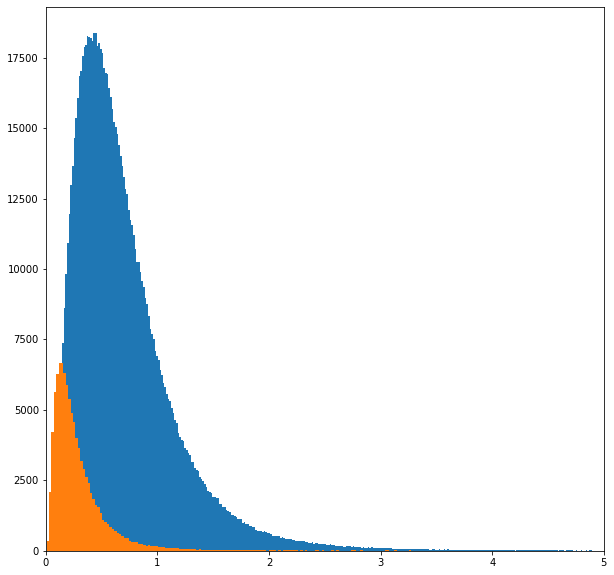

In [48]:
plt.rcParams["figure.figsize"] = (10,10)
plt.hist(signalAE_loss_bkg,5000)
plt.hist(signalAE_loss_signal,5000)
plt.xlim([0,5])
#plt.ylim([0,500])

In [44]:
def get_tpr_fpr(sigloss,bkgloss,aetype='sig'):
    bins = np.linspace(0,50,1001)
    tpr = []
    fpr = []
    for cut in bins:
        if aetype == 'sig':
            tpr.append(np.where(sigloss<cut)[0].shape[0]/len(sigloss))
            fpr.append(np.where(bkgloss<cut)[0].shape[0]/len(bkgloss))
        if aetype == 'bkg':
            tpr.append(np.where(sigloss>cut)[0].shape[0]/len(sigloss))
            fpr.append(np.where(bkgloss>cut)[0].shape[0]/len(bkgloss))
    return tpr,fpr        

In [75]:
def get_tpr_fpr_2d(sigae_sigloss,sigae_bkgloss,bkgae_sigloss,bkgae_bkgloss):
    bins_sigae = np.linspace(0,50,501)
    bins_bkgae = np.linspace(0,50,501)
    tpr = []
    fpr = []
    for sigcut in bins_sigae:
        for bkgcut in bins_bkgae:
            tpr_t = np.where((sigae_sigloss<sigcut)&(bkgae_sigloss>bkgcut))[0].shape[0]/len(sigae_sigloss)
            fpr_t = np.where((sigae_bkgloss<sigcut)&(bkgae_bkgloss>bkgcut))[0].shape[0]/len(sigae_bkgloss)
            tpr.append(tpr_t)
            fpr.append(fpr_t)
                

    return tpr,fpr        

In [46]:
def get_tpr_fpr_2d_new(sigae_sigloss,sigae_bkgloss,bkgae_sigloss,bkgae_bkgloss):
    bins_sigae = np.linspace(0,50,501)
    bins_bkgae = np.linspace(0,50,501)
    tpr = []
    fpr = []
    for sigcut in bins_sigae:
        compare = -0.1
        tpr_temp = 0
        fpr_temp = 0 
        for bkgcut in bins_bkgae:
            tpr_t = np.where((sigae_sigloss<sigcut)&(bkgae_sigloss>bkgcut))[0].shape[0]/len(sigae_sigloss)
            fpr_t = np.where((sigae_bkgloss<sigcut)&(bkgae_bkgloss>bkgcut))[0].shape[0]/len(sigae_bkgloss)
            if fpr_t == 0:
                fpr_t = 1000000000
            ratio = tpr_t/fpr_t
            if ratio > compare:
                compare = ratio
                tpr_temp = tpr_t
                fpr_temp = fpr_t
        tpr.append(tpr_temp)
        fpr.append(fpr_temp)
                

    return tpr,fpr        

In [99]:
sig_tpr, sig_fpr = get_tpr_fpr(signalAE_loss_signal,signalAE_loss_bkg,aetype='sig')

In [45]:
bkg_tpr, bkg_fpr = get_tpr_fpr(loss_signal,loss_bkg,aetype='bkg')

In [108]:
twod_tpr, twod_fpr = get_tpr_fpr_2d(signalAE_loss_signal,signalAE_loss_bkg,loss_signal,loss_bkg)

In [47]:
bkgaeloss_sig_nf = np.load('/home/spark/LHCOlympics/LHC-Olympics/Code/NFLOWVAE_bkgAE_loss_sig.npy')
bkgaeloss_bkg_nf = np.load('/home/spark/LHCOlympics/LHC-Olympics/Code/NFLOWVAE_bkgAE_loss_bkg.npy')

In [101]:
twod_nflowbkg_tpr, twod_nflowbkg_fpr = get_tpr_fpr_2d(signalAE_loss_signal,signalAE_loss_bkg,bkgaeloss_sig_nf,bkgaeloss_bkg_nf)

In [48]:
twod_nflowbkg_tau21sig_tpr, twod_nflowbkg_tau21sig_fpr = get_tpr_fpr_2d(signalAE_loss_signal,signalAE_loss_bkg,bkgaeloss_sig_nf,bkgaeloss_bkg_nf)

In [49]:
twod_nflowbkg_tau21sig_tpr.append(0)
twod_nflowbkg_tau21sig_fpr.append(1)
twod_nflowbkg_tau21sig_tpr.append(0)
twod_nflowbkg_tau21sig_fpr.append(0)
twod_nflowbkg_tau21sig_tpr.append(1)
twod_nflowbkg_tau21sig_fpr.append(1)

In [121]:
twod_nflowbkg_tpr.append(0)
twod_nflowbkg_fpr.append(1)
twod_nflowbkg_tpr.append(0)
twod_nflowbkg_fpr.append(0)
twod_nflowbkg_tpr.append(1)
twod_nflowbkg_fpr.append(1)

In [50]:
from scipy.spatial import ConvexHull

In [108]:
points2 = np.array([twod_nflowbkg_tau21sig_fpr,twod_nflowbkg_tau21sig_tpr])

In [109]:
points2 = points2.transpose()

In [113]:
points2.shape

(251004, 2)

In [111]:
hull2 = ConvexHull(points2)

In [122]:
points = np.array([twod_nflowbkg_fpr,twod_nflowbkg_tpr])

In [123]:
points = points.transpose()

In [124]:
points.shape

(251004, 2)

In [125]:
hull1 = ConvexHull(points)

In [119]:
plt.plot(points2[hull2.vertices,0], points1[hull1.vertices,1], 'r--', lw=2)

NameError: name 'points1' is not defined

In [86]:
y_true = np.load('/home/spark/LHCOlympics/LHC-Olympics/Code/supervised_truth.npy')
scores = np.load('/home/spark/LHCOlympics/LHC-Olympics/Code/supervised_score.npy')

In [64]:
nflow_bkg_fpr = np.load('/home/spark/LHCOlympics/LHC-Olympics/Code/NFLOWVAE_bkgAE_fpr.npy')
nflow_bkg_tpr = np.load('/home/spark/LHCOlympics/LHC-Olympics/Code/NFLOWVAE_bkgAE_tpr.npy')

In [88]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_true, scores)

In [112]:
np.save('/home/spark/LHCOlympics/LHC-Olympics/Code/AE_sigAE_fpr.npy',sig_fpr)
np.save('/home/spark/LHCOlympics/LHC-Olympics/Code/AE_sigAE_tpr.npy',sig_tpr)
np.save('/home/spark/LHCOlympics/LHC-Olympics/Code/AE_bkgAE_fpr.npy',bkg_fpr)
np.save('/home/spark/LHCOlympics/LHC-Olympics/Code/AE_bkgAE_tpr.npy',bkg_tpr)

In [145]:
hull1.vertices

array([     0, 251001, 251003, 196896, 196897, 196898, 196899, 196900,
         9526,   9025,   8023,   8024,   7022,   6521,   7023,   6522,
         6021,   5520,   5521,   5020,   4519,   5021,   4520,   4019,
         4020,   3519,   3018,   3019,   2518,   2519,   2018,   2019,
         2020,   1517,   1518,   1519,   1520,   1017,   1018,   1019,
          515,    516,    517,    524,    533,   1051], dtype=int32)

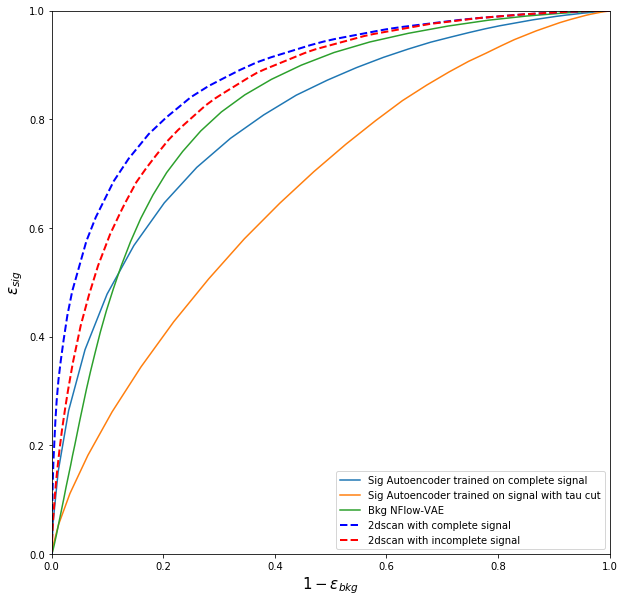

In [147]:
plt.plot(sig_fpr,sig_tpr,label='Sig Autoencoder trained on complete signal')
plt.plot(sig_tau21cut_fpr,sig_tau21cut_tpr,label='Sig Autoencoder trained on signal with tau cut')
#plt.plot(bkg_fpr,bkg_tpr,label='Bkg Autoencoder')
plt.plot(nflow_bkg_fpr,nflow_bkg_tpr,label='Bkg NFlow-VAE')

#plt.plot(twod_fpr,twod_tpr,'bo',label='AE 2dscan',markersize=2)
#plt.plot(twod_nflowbkg_fpr,twod_nflowbkg_tpr,'bo',label='AE 2dscan',markersize=2,alpha=0.7)
#plt.plot(twod_nflowbkg_tau21sig_fpr, twod_nflowbkg_tau21sig_tpr,'ro',label='2dscan with cut signal',markersize=2,alpha=0.7)
plt.plot(points[hull1.vertices[2:],0], points[hull1.vertices[2:],1], 'b--', lw=2,label='2dscan with complete signal')
plt.plot(points2[hull2.vertices[2:],0], points2[hull2.vertices[2:],1], 'r--', lw=2,label='2dscan with incomplete signal')

#plt.plot(fpr,tpr,label='Supervised')
plt.xlabel(r'$1-\epsilon_{bkg}$',fontsize=15)
plt.ylabel(r'$\epsilon_{sig}$',fontsize=15)
#plt.semilogy()
plt.legend(loc='lower right')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.savefig('ROC_Curve_ver3.png')

In [ ]:
total_data = torch.tensor(dt)
total_data_train_x_1 = total_data.t()[0:6].t()
total_data_train_x_2 = total_data.t()[7:13].t()
total_data_selection = torch.cat((total_data_train_x_1,total_data_train_x_2),dim=1)

In [ ]:
signalAE_loss_total = torch.mean((sig_model_dec(sig_model_enc(total_data_selection.float().cuda()))-total_data_selection.float().cuda())**2,dim=1).data.cpu().numpy()
loss_total = torch.mean((model_dec(model_enc(total_data_selection.float().cuda()))-total_data_selection.float().cuda())**2,dim=1).data.cpu().numpy()


In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(loss_total,signalAE_loss_total,"b.",alpha=1)
plt.xlim([1.5,2.3])
plt.ylim([0,0.5])

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
plt.hist(signalAE_loss_total,5000)
plt.xlim([0,2])

In [ ]:
selection_sig_idx = np.where((loss_total>1.5) & (signalAE_loss_total<0.5))[0]

In [ ]:
print(selection_sig_idx)

In [ ]:
selectedmass = dt[selection_sig_idx,14]

In [ ]:
print(selectedmass)

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
plt.hist(selectedmass,50)
plt.savefig('selectedmass_with_bothAE.png')

In [ ]:
TEST_selection_based_on_bkg_idx = np.where((loss_total>1.5))[0]

In [ ]:
TEST_selection_based_on_bkg_selectedmass = dt[TEST_selection_based_on_bkg_idx,14]

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
plt.hist(TEST_selection_based_on_bkg_selectedmass,50)
plt.savefig('selectedmass_with_bkgAE.png')